In [1]:
# importing tools 
import s3fs
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt 
import math 
from matplotlib.patches import Ellipse
#for removing warnings
import warnings

In [2]:
# open the data with s3fs from the databucket 
fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
#data_path2 = 's3://data/vel_dataIII.zarr/vel_dataIII.zarr'
data_path1 = 's3://velocity-u.zarr'
data_path2 = 's3://velocity-v.zarr'
data_path3 = 's3://data/CREG12.L75-REF08_mesh_zgr.zarr'
remote_files1 = fsg.glob(data_path1)
remote_files2 = fsg.glob(data_path2)
remote_files3 = fsg.glob(data_path3)

store1 = s3fs.S3Map(root=data_path1, s3=fsg, check=False)
store2 = s3fs.S3Map(root=data_path2, s3=fsg, check=False)
store3 = s3fs.S3Map(root=data_path3, s3=fsg, check=False)

du = xr.open_zarr(store=store1, consolidated=True)
dv = xr.open_zarr(store=store2, consolidated=True)
dzz = xr.open_zarr(store=store3, consolidated=True)

In [4]:
def open_s3fs(path):
    # open the data with s3fs from the databucket 
    fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
    data_path = f's3://{path}'
    remote_files = fsg.glob(data_path)
    fileset = [fsg.open(file) for file in remote_files]
    #open the dataset 
    dset = xr.open_mfdataset(fileset, 
                             #combine='by_coords',
                             compat='override')
    return dset

In [20]:
dzz.mbathy

<xarray.DataArray 'mbathy' (t: 1, y: 1801, x: 1580)>
dask.array<xarray-mbathy, shape=(1, 1801, 1580), dtype=int16, chunksize=(1, 1801, 1580), chunktype=numpy.ndarray>
Dimensions without coordinates: t, y, x

In [5]:
dh = open_s3fs('ice-model/CREG12.L75-REF08_y2000.5d_siconc_mean.nc')

In [6]:
dh

<xarray.Dataset>
Dimensions:        (time_counter: 1, x: 1580, y: 1801)
Coordinates:
    nav_lat        (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
    time_centered  (time_counter) object dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: time_counter, x, y
Data variables:
    siconc         (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
Attributes:
    name:              /scratch/cnt0028/lpo7420/talandic/CREG12.L75-REF08-XIO...
    description:       ice variables
    title:             ice variables
    Conventions:       CF-1.5
    production:        An IPSL model
    timeStamp:         2020-May-14 10:29:13 CEST
    start_date:        19790101
    output_frequency:  5d
    CONFIG:            CREG12.L75
    CASE:              REF08

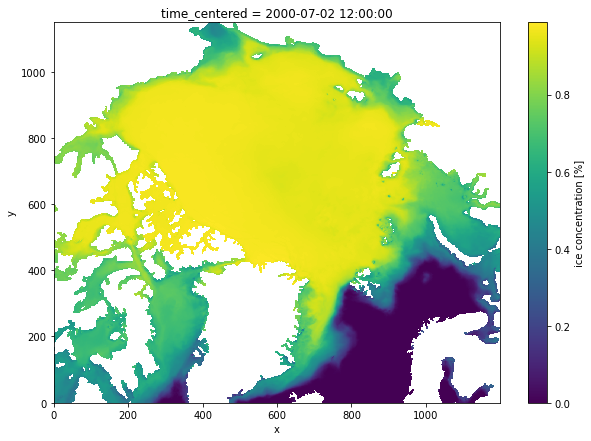

In [14]:
dh.siconc.isel(x=slice(200,1400),y=slice(650,1800)).plot(figsize=(10,7))

In [30]:
moor_l = [[912,  10],
         [900, 233],
         [758,110],
         [870, 600],
         [820, 200],
         [475, 525],
         #[197, 900],#
         [530, 625],
         [530, 985]]
d = dzz.mbathy.isel(x=slice(200,1400),y=slice(650,1800)).squeeze(axis=0)
d

<xarray.DataArray 'mbathy' (y: 1150, x: 1200)>
dask.array<getitem, shape=(1150, 1200), dtype=int16, chunksize=(1150, 1200), chunktype=numpy.ndarray>
Dimensions without coordinates: y, x

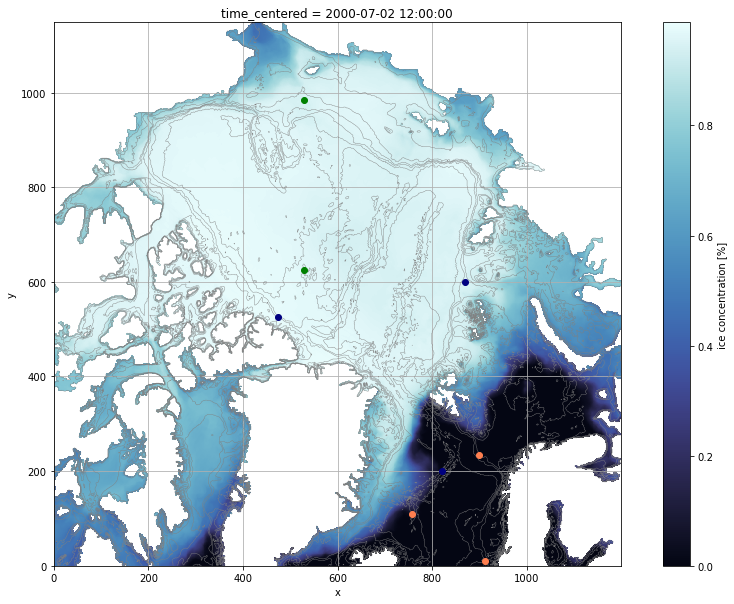

In [33]:
import cmocean
fig, ax = plt.subplots(figsize=(15,10))
ax.contour(d, colors='grey',levels=8, linewidths=0.4)
dh.siconc.isel(x=slice(200,1400),y=slice(650,1800)).plot(cmap=plt.get_cmap(cmocean.cm.ice))
c_l = ['coral','coral','coral','navy','navy','navy','g','g']
for i,p in enumerate(moor_l):
    x = p[0]
    y = p[1]
    ax.plot(x, y, marker='o', color=c_l[i])
ax.grid('on')

ax.set_aspect('equal')
#plt.savefig('icecover.pdf', dpi = 300)

In [16]:
du

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, depthu: 75, time_counter: 73, x: 1580, y: 1801)
Coordinates:
  * depthu                (depthu) float32 0.5058 1.556 ... 5.698e+03 5.902e+03
    nav_lat               (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
    time_centered         (time_counter) object dask.array<chunksize=(73,), meta=np.ndarray>
  * time_counter          (time_counter) object 2000-01-03 12:00:00 ... 2000-...
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    depthu_bounds         (time_counter, depthu, axis_nbounds) float32 dask.array<chunksize=(1, 75, 2), meta=np.ndarray>
    sozotaux              (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) object dask.array<chunksize=(73, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) object dask.array<chunksize=(73, 2), meta=np.ndarray>
    utau_atmoce           (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    utau_iceoce           (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    uwspd10               (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    vozocrtx              (time_counter, depthu, y, x) float32 dask.array<chunksize=(1, 75, 1801, 1580), meta=np.ndarray>
Attributes:
    CASE:              REF08
    CONFIG:            CREG12.L75
    Conventions:       CF-1.5
    description:       ocean U grid variables
    name:              /scratch/cnt0028/lpo7420/talandic/CREG12.L75-REF08-XIO...
    output_frequency:  5d
    production:        An IPSL model
    start_date:        19790101
    timeStamp:         2020-May-14 08:39:48 CEST
    title:             ocean U grid variables